In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data
from nnfs.datasets import vertical_data

In [38]:
nnfs.init()

In [39]:
class layer_dense:
    def __init__(self,n_inputs,n_neurons):
        self.weights=0.10*np.random.randn(n_inputs, n_neurons)
        self.biases=np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output=np.dot(inputs,self.weights)+self.biases


class activation_relu:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)


class activation_softmax:
    def forward(self,inputs):
        exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        probabilities=exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output=probabilities

class loss:
    def calculate(self,output,y):
        sample_losses=self.forward(output,y)
        data_loss=np.mean(sample_losses)
        return data_loss
    
class loss_categoricalcrossentropy(loss):
    def forward(self,y_pred,y_true):
        samples=len(y_pred)
        y_pred_clipped=np.clip(y_pred,1e-7,1-1e-7)

        if len(y_true.shape)==1:
            correct_confidences=y_pred_clipped[range(samples),y_true]

        elif len(y_true.shape)==2:
            correct_confidences=np.sum(y_pred_clipped*y_true,axis=1)
        
        negative_log_likelihood=-np.log(correct_confidences)
        return negative_log_likelihood
        


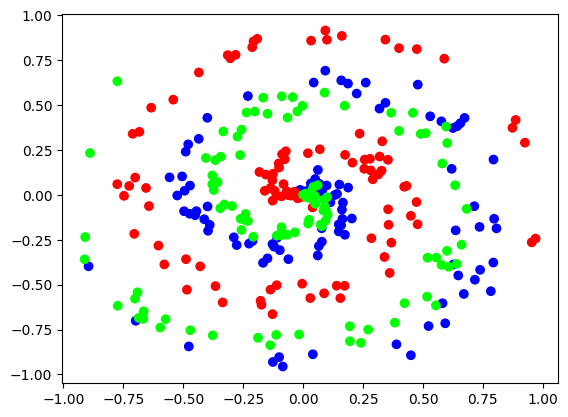

In [40]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.show()

In [41]:
X,y=spiral_data(samples=100,classes=3)


dense1=layer_dense(2,3)
activation1=activation_relu()

dense2=layer_dense(3,3)
activation2=activation_softmax()

lowest_loss=9999999
best_dense1_weights=dense1.weights.copy()
best_dense1_biases=dense1.biases.copy()
best_dense2_weights=dense2.weights.copy()
best_dense2_biases=dense2.biases.copy()

for iteration in range(100000):
    dense1.weights+=0.05*np.random.randn(2,3)
    dense1.biases+=0.05*np.random.randn(1,3)
    dense2.weights+=0.05*np.random.randn(3,3)
    dense2.biases+=0.05*np.random.randn(1,3)

    dense1.forward(X)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss_function=loss_categoricalcrossentropy()
    loss=loss_function.calculate(activation2.output,y)

    predictions=np.argmax(activation2.output,axis=1)
    accuracy=np.mean(predictions==y)

    if loss< lowest_loss:
        print("new set of weights found, iteration: ",iteration,"loss: ",loss,"acc: ",accuracy)
        best_dense1_weights=dense1.weights.copy()
        best_dense1_biases=dense1.biases.copy()
        best_dense2_weights=dense2.weights.copy()
        best_dense2_biases=dense2.biases.copy()
        lowest_loss=loss

    else:
        dense1.weights=best_dense1_weights.copy()
        dense1.biases=best_dense1_biases.copy()
        dense2.weights=best_dense2_weights.copy()
        dense2.biases=best_dense2_biases.copy()


new set of weights found, iteration:  0 loss:  1.1010509 acc:  0.3333333333333333
new set of weights found, iteration:  1 loss:  1.0993538 acc:  0.3333333333333333
new set of weights found, iteration:  2 loss:  1.0988902 acc:  0.3333333333333333
new set of weights found, iteration:  3 loss:  1.0982764 acc:  0.36
new set of weights found, iteration:  8 loss:  1.0982085 acc:  0.33666666666666667
new set of weights found, iteration:  9 loss:  1.0977141 acc:  0.34
new set of weights found, iteration:  10 loss:  1.0970951 acc:  0.35333333333333333
new set of weights found, iteration:  18 loss:  1.0968996 acc:  0.3466666666666667
new set of weights found, iteration:  23 loss:  1.09671 acc:  0.33
new set of weights found, iteration:  30 loss:  1.0965257 acc:  0.33
new set of weights found, iteration:  33 loss:  1.0959501 acc:  0.36
new set of weights found, iteration:  35 loss:  1.0957578 acc:  0.3233333333333333
new set of weights found, iteration:  37 loss:  1.0952092 acc:  0.35333333333333